In [1]:
import numpy as np
from matplotlib import pyplot as plt

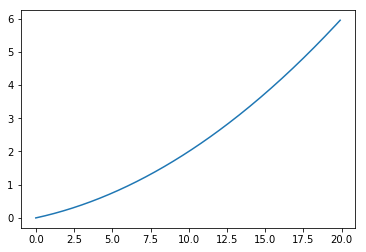

In [2]:
def num_diff(f, x):
    h = le-4
    return ((f(x + h) - f(x-h))/2 *h)

def fun1(x):
    return 0.01 * x ** 2 + 0.1 * x

X = np.arange(0, 20, 0.1)
y = fun1(X)
plt.plot(X, y)

In [94]:
def fun2(x):
    return x[0] * x[0] + x[1] * x[1]

def num_gradent(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    print("num_gradient:: x.size: ", x.size)
    print("num_gradient:: x.shape: ", np.shape(x))
    print("num_gradient:: len(x): ", len(x))
    for idx in range(len(x)):
        tmp_value = x[idx]
        x[idx] = tmp_value + h
        fph1 = f(x)
        
        x[idx] = tmp_value - h
        fph2 = f(x)
        
        numdiff = (fph1 - fph2)/(2 * h)
        grad[idx] = numdiff
        x[idx] = tmp_value
        
    return grad

In [95]:
num_gradent(fun2, np.array([3.0,4.0]))

num_gradient:: x.size:  2
num_gradient:: x.shape:  (2,)
num_gradient:: len(x):  2


array([6., 8.])

In [84]:
def softmax(a):
    c = np.exp(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [85]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [86]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
#     def __init__(self, w):
#         slef.W = w
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        y = predict(x)
        z = softmax(y)
        
        return cross_entropy_error(z, t)

In [87]:
x_init = np.array([6.0, 9.0])
net = simpleNet()
net.predict(x_init)

array([ 5.00850992, -5.20986145,  6.62452351])

In [88]:
def sigmod(x):
    return 1 / (1 + np.exp(-x))

In [89]:
class TwoLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, init_std=0.01):
        self.param={}
        self.param["w1"] = init_std * np.random.randn(input_size, hidden_size)
        self.param["b1"] = np.zeros(hidden_size)
        self.param["w2"] = init_std * np.random.randn(hidden_size, output_size)
        self.param["b2"] = np.zeros(output_size)
    
    def predict(self, x):
        w1, w2 = self.param["w1"], self.param["w2"]
        b1, b2 = self.param["b1"], self.param["b2"]
        
        a1 = np.dot(x, w1) + b1
        z = sigmod(a1)
        a2 = np.dot(z, w2) + b2
        y = softmax(a2)
        
        return y
    
    def accuracy(x, t):
        y = self.predict(x)
        y = np.argmax(x, axis=1)
        t = np.argmax(t, axis=1)
        r = np.sum(y == t) / len(y)
        
        return r
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def gradient(self, x, t):
        print("gradient::shape(x): ", np.shape(x))
        f = lambda w: self.loss(x, t)
        grads = {}
        
        grads["w1"] = num_gradent(f, self.param["w1"])
        grads["b1"] = num_gradent(f, self.param["b1"])
        grads["w2"] = num_gradent(f, self.param["w2"])
        grads["b2"] = num_gradent(f, self.param["b2"])
        
        return grads

In [90]:
net = TwoLayerNetwork(input_size=784, hidden_size=100, output_size=10)
print("w1.shape", net.param["w1"].shape)
print("b1.shape", net.param["b1"].shape)
print("w2.shape", net.param["w2"].shape)
print("b2.shape", net.param["b2"].shape)

w1.shape (784, 100)
b1.shape (100,)
w2.shape (100, 10)
b2.shape (10,)


In [97]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
print("x::x.shape: ", np.shape(x))
print("t::t.shape: ", np.shape(t))
grads = net.gradient(x, t)
print("w1.shape", grads["w1"].shape)
print("b1.shape", grads["b1"].shape)
print("w2.shape", grads["w2"].shape)
print("b2.shape", grads["b2"].shape)

print(grads)

x::x.shape:  (100, 784)
t::t.shape:  (100, 10)
gradient::shape(x):  (100, 784)
num_gradient:: x.size:  78400
num_gradient:: x.shape:  (784, 100)
num_gradient:: len(x):  784
num_gradient:: x.size:  100
num_gradient:: x.shape:  (100,)
num_gradient:: len(x):  100
num_gradient:: x.size:  1000
num_gradient:: x.shape:  (100, 10)
num_gradient:: len(x):  100
num_gradient:: x.size:  10
num_gradient:: x.shape:  (10,)
num_gradient:: len(x):  10
w1.shape (784, 100)
b1.shape (100,)
w2.shape (100, 10)
b2.shape (10,)
{'w2': array([[0.09714568, 0.09714568, 0.09714568, 0.09714568, 0.09714568,
        0.09714568, 0.09714568, 0.09714568, 0.09714568, 0.09714568],
       [0.07764416, 0.07764416, 0.07764416, 0.07764416, 0.07764416,
        0.07764416, 0.07764416, 0.07764416, 0.07764416, 0.07764416],
       [0.09658198, 0.09658198, 0.09658198, 0.09658198, 0.09658198,
        0.09658198, 0.09658198, 0.09658198, 0.09658198, 0.09658198],
       [0.08817132, 0.08817132, 0.08817132, 0.08817132, 0.08817132,
      